---
#**Cat v/s Dog Image Classification using K Means, CNN, and Transfer Learning**
---
Abhijith Dameruppala (adameru@iu.edu)


In [ ]:
# Importing all the required libraries
import keras
import os
import zipfile
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import keras
import cv2
import tensorflow as tf
#import K-Means
from sklearn.cluster import KMeans
# important metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline


In [ ]:
# Converting the zip files to folders in the google drive.
# !!!!!!!!  This code block doesn't require to be run every time since it overwrites the existing folder eitherway.

# import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Data_Mining_Project/trainData.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/Data_Mining_Project")
with zipfile.ZipFile("/content/drive/MyDrive/Data_Mining_Project/testData.zip", 'r') as zip_ref2:
    zip_ref2.extractall("/content/drive/MyDrive/Data_Mining_Project")

KeyboardInterrupt: ignored

In [ ]:
# This cell is just to check if the extracted file is working correctly or not
k = 0
for i in os.listdir("/content/drive/MyDrive/Data_Mining_Project/train"):
  if(k == 10):
    break
  else:
    img=cv2.imread("/content/drive/MyDrive/Data_Mining_Project/train/"+i)
    img=cv2.resize(img,(32,32))
    print(img)
    k += 1
# The data input has been done successfully.

[[[ 3  1  4]
  [ 4  3  5]
  [ 2  4  5]
  ...
  [ 3  3 10]
  [ 4  4 10]
  [ 3  3  9]]

 [[ 3  2  4]
  [ 3  2  4]
  [ 2  3  4]
  ...
  [ 3  3  9]
  [ 5  5 10]
  [ 4  4 10]]

 [[ 3  2  4]
  [ 3  2  4]
  [ 3  3  5]
  ...
  [ 2  2  8]
  [ 4  4 10]
  [ 4  4 10]]

 ...

 [[ 9 10  8]
  [ 8  9  7]
  [ 8  7  3]
  ...
  [ 6  8  8]
  [ 4  8  9]
  [ 4  6  7]]

 [[ 9 10  8]
  [ 9 10  9]
  [ 7  8  6]
  ...
  [ 5  7  7]
  [ 5  7  8]
  [ 5  7  8]]

 [[ 8  9  7]
  [12 13 11]
  [11 12 10]
  ...
  [ 5  7  7]
  [ 5  7  8]
  [ 5  7  8]]]
[[[ 63  69  66]
  [153 155 166]
  [145 154 158]
  ...
  [ 34  14   2]
  [ 31  16   5]
  [ 27  11   4]]

 [[114 110 115]
  [ 63  56  70]
  [ 73  70  97]
  ...
  [ 48  23  15]
  [ 19   9   5]
  [ 14   5   2]]

 [[ 28  24  15]
  [ 32  24  27]
  [ 90  85 106]
  ...
  [ 24  14   6]
  [ 16  12   9]
  [ 33  33  25]]

 ...

 [[127 125 163]
  [112 108 155]
  [148 142 185]
  ...
  [214 214 213]
  [195 194 193]
  [131 134 136]]

 [[ 85  79  80]
  [106 102 153]
  [152 150 202]
  ...
  

In [ ]:
data = []
label = []
a = 0
b = 0
IMG_SIZE = 32
for file in os.listdir("/content/drive/MyDrive/Data_Mining_Project/train"):
    img = cv2.imread("/content/drive/MyDrive/Data_Mining_Project/train/"+file)
    # if(img.any() != None):
    img = cv2.resize(img,(32,32))
    # print(img)

    # img = img.astype('float32')
    if file[:3]=='cat':
        if c==500: continue
        a = a + 1
        label.append("cat")
    else:
        if b == 500: continue
        b = b + 1
        label.append("dog")
    data.append(img)
data = np.array(data)

In [ ]:
print(data)

[[[[  3.   1.   4.]
   [  4.   3.   5.]
   [  2.   4.   5.]
   ...
   [  3.   3.  10.]
   [  4.   4.  10.]
   [  3.   3.   9.]]

  [[  3.   2.   4.]
   [  3.   2.   4.]
   [  2.   3.   4.]
   ...
   [  3.   3.   9.]
   [  5.   5.  10.]
   [  4.   4.  10.]]

  [[  3.   2.   4.]
   [  3.   2.   4.]
   [  3.   3.   5.]
   ...
   [  2.   2.   8.]
   [  4.   4.  10.]
   [  4.   4.  10.]]

  ...

  [[  9.  10.   8.]
   [  8.   9.   7.]
   [  8.   7.   3.]
   ...
   [  6.   8.   8.]
   [  4.   8.   9.]
   [  4.   6.   7.]]

  [[  9.  10.   8.]
   [  9.  10.   9.]
   [  7.   8.   6.]
   ...
   [  5.   7.   7.]
   [  5.   7.   8.]
   [  5.   7.   8.]]

  [[  8.   9.   7.]
   [ 12.  13.  11.]
   [ 11.  12.  10.]
   ...
   [  5.   7.   7.]
   [  5.   7.   8.]
   [  5.   7.   8.]]]


 [[[ 63.  69.  66.]
   [153. 155. 166.]
   [145. 154. 158.]
   ...
   [ 34.  14.   2.]
   [ 31.  16.   5.]
   [ 27.  11.   4.]]

  [[114. 110. 115.]
   [ 63.  56.  70.]
   [ 73.  70.  97.]
   ...
   [ 48.  23.  15.]
 

In [ ]:
dataLabel = []
for i in label:
    if i=="cat": dataLabel.append(0)
    else: dataLabel.append(1)
dataLabel = np.array(dataLabel)

In [ ]:
data = data/255.0
reshapedData = data.reshape(len(data),-1)

In [ ]:
reshapedData.shape

(1000, 3072)

Standard K Means Model

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(reshaped_data)
kmeans.cluster_centers_.shape

(2, 3072)

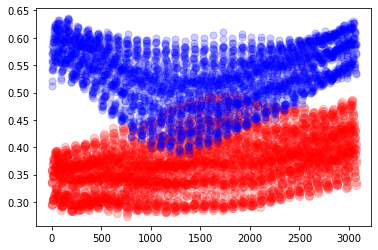

In [ ]:
xData = [i for i in range(3072)]
plt.scatter(xData,kmeans.cluster_centers_[0], color = 'red',alpha=0.2,s=70)
plt.scatter(xData,kmeans.cluster_centers_[1] , color = 'blue',alpha=0.2,s=50)

Image Classification

In [ ]:
# Functions that map labels from the cluster to the original labels
def getReferenceDict(clusters,dataLabel):
    referenceLabel = {}
  
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(clusters))):
        index = np.where(clusters == i,1,0)
        num = np.bincount(dataLabel[index==1]).argmax()
        referenceLabel[i] = num
    return referenceLabel

# Functions that map predictions to original labels
def getLabels(clusters,refernceLabels):
    tempLabels = np.random.rand(len(clusters))
    
    for i in range(len(clusters)):
        tempLabels[i] = referenceLabels[clusters[i]]
    return tempLabels

In [ ]:
referenceLabels = getReferenceDict(clusters,dataLabel)
predictedLabels = getLabels(clusters,referenceLabels)
print(accuracy_score(predicted_labels,data_label))

0.531


Elbow Method

Accuracy for k = 2:  0.531
Accuracy for k = 16:  0.609
Accuracy for k = 64:  0.617
Accuracy for k = 100:  0.658
Accuracy for k = 256:  0.711


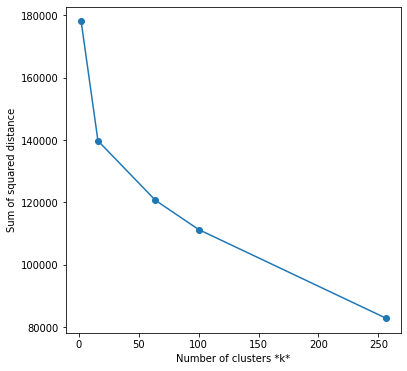

In [ ]:
sse = []
listK = [2,16,64,100,256]
for i in listK:
    km = KMeans(n_clusters = i)
    clusters = km.fit_predict(reshapedData)
    sse.append(km.inertia_)
    referenceLabels = getReferenceDict(clusters,dataLabel)
    predictedLabels = getLabels(clusters,referenceLabels)
    print(f"Accuracy for k = {k}: ", accuracy_score(predictedLabels,dataLabel))

# Plot of Sum Squared Error against number of Clusters 'k'
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [ ]:
names = os.listdir("/content/drive/MyDrive/Data_Mining_Project/train")
categories = []
for f_name in names:
    category = f_name.split('.')[0]
    if(category == 'dog'):
        categories.append(1)
    else:
        categories.append(0)
df = pd.DataFrame({
    'filename':filenames,
    'category':categories
})


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from sklearn.model_selection import train_test_split

df["category"] = df["category"].replace({0: 'cat',1: 'dog'})
train_df, validate_df = train_test_split(df,test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

Data Augmwntation

In [ ]:
# Data Augmentation
imageSize = (32, 32)
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "/content/drive/MyDrive/Data_Mining_Project/train/",x_col='filename',y_col='category',
                                                 target_size=imageSize,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/drive/MyDrive/Data_Mining_Project/train/", 
    x_col='filename',
    y_col='category',
    target_size=imageSize,
    class_mode='categorical',
    batch_size=batch_size
)
test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)
test_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "/content/drive/MyDrive/Data_Mining_Project/train/",x_col='filename',y_col='category',
                                                 target_size=imageSize,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

Found 20040 validated image filenames belonging to 2 classes.
Found 5010 validated image filenames belonging to 2 classes.
Found 20040 validated image filenames belonging to 2 classes.


In [ ]:
epochs=10
history = model.fit_generator(
    train_generator, 
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_validate//batch_size,
    steps_per_epoch = total_train//batch_size,
)

Epoch 1/10


<ipython-input-164-e7642de216d6>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


1336/1336 [==============================] - 114s 86ms/step - loss: 0.4805 - accuracy: 0.7692 - val_loss: 0.4889 - val_accuracy: 0.7597
Epoch 2/10
1336/1336 [==============================] - 110s 83ms/step - loss: 0.4789 - accuracy: 0.7718 - val_loss: 0.5013 - val_accuracy: 0.7623
Epoch 3/10
1336/1336 [==============================] - 111s 83ms/step - loss: 0.4755 - accuracy: 0.7742 - val_loss: 0.5854 - val_accuracy: 0.7257
Epoch 4/10
1336/1336 [==============================] - 111s 83ms/step - loss: 0.4740 - accuracy: 0.7782 - val_loss: 0.4587 - val_accuracy: 0.7838
Epoch 5/10
1336/1336 [==============================] - 111s 83ms/step - loss: 0.4726 - accuracy: 0.7766 - val_loss: 0.4415 - val_accuracy: 0.8010
Epoch 6/10
1336/1336 [==============================] - 109s 82ms/step - loss: 0.4701 - accuracy: 0.7784 - val_loss: 0.4269 - val_accuracy: 0.8048
Epoch 7/10
1336/1336 [==============================] - 111s 83ms/step - loss: 0.4677 - accuracy: 0.7820 - val_loss: 0.3924 - val

In [ ]:
test_filenames = os.listdir("/content/drive/MyDrive/Data_Mining_Project/test1")
test_df = pd.DataFrame({
    'filename': test_filenames,
    'category':""
})
nb_samples = test_df.shape[0]

In [ ]:
print(test_df)

                 filename category
0                9099.jpg         
1                  91.jpg         
2                 910.jpg         
3                9100.jpg         
4                9101.jpg         
...                   ...      ...
12496           10444.jpg         
12497           10445.jpg         
12498           10446.jpg         
12499           10447.jpg         
12500  .ipynb_checkpoints         

[12501 rows x 2 columns]


In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


<ipython-input-185-52619fd72ccc>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


In [ ]:
len(predict)

12510

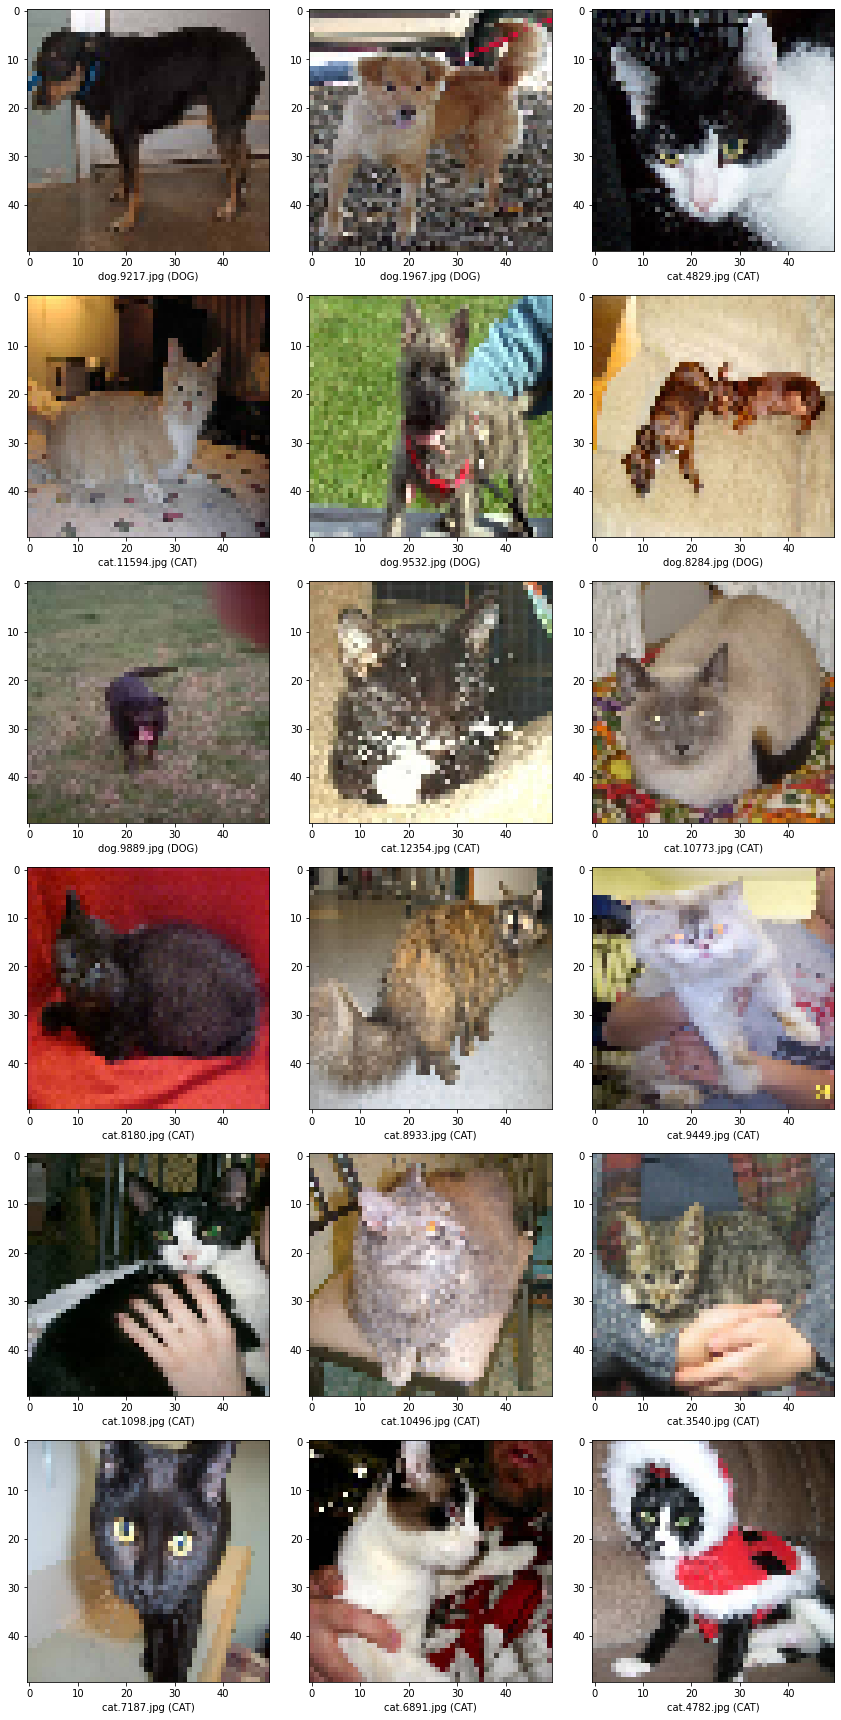

In [ ]:
from tensorflow.keras.utils import load_img

sampleTest = train_df.head(18)
sampleTest.head()
plt.figure(figsize=(12, 24))
for i, j in sampleTest.iterrows():
    filename = j['filename']
    category = j['category']
    img = load_img("/content/drive/MyDrive/Data_Mining_Project/train/" + filename, target_size=(50, 50))
    plt.subplot(6, 3, i+1)
    plt.imshow(img)
    plt.xlabel(filename + ' (' + "{}".format(category.upper()) + ')' )
plt.tight_layout()
plt.show()


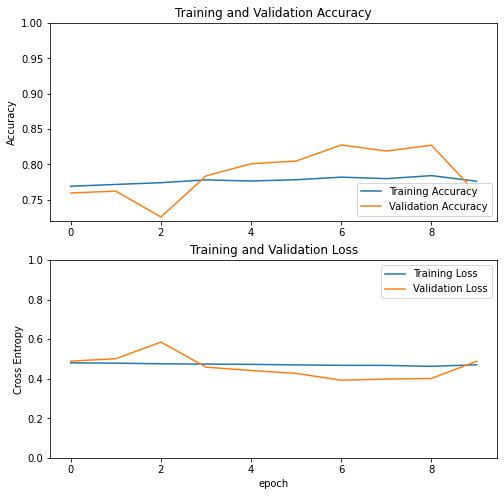

In [ ]:
# Accuracy and Loss v/s Epochs graph

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zipAdd = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
add = os.path.join(os.path.dirname(zipAdd), 'cats_and_dogs_filtered')

trainDir = os.path.join(add, 'train')
validationDir = os.path.join(add, 'validation')

BATCH_SIZE = 32
imgSize = (50, 50)

trainDataset = tf.keras.utils.image_dataset_from_directory(trainDir, shuffle=True, batch_size = 32, image_size = imgSize)

68606236/68606236 [==============================] - 4s 0us/step
Found 2000 files belonging to 2 classes.


In [ ]:
validationDataset = tf.keras.utils.image_dataset_from_directory(validationDir, shuffle = True, batch_size = 32, image_size = imgSize)

Found 1000 files belonging to 2 classes.


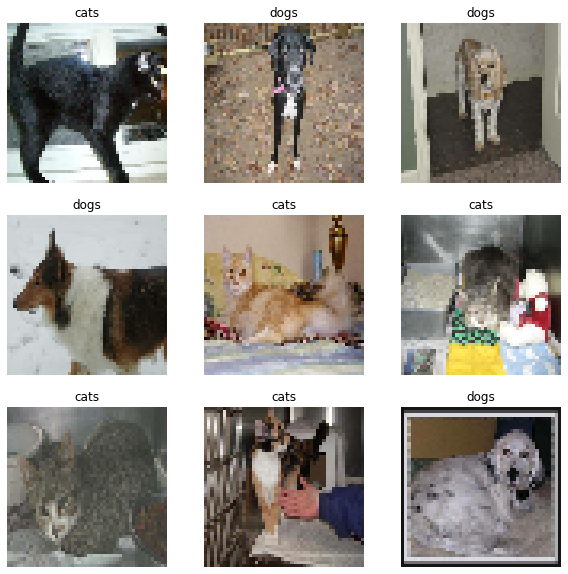

In [ ]:
classNames = trainDataset.classNames

plt.figure(figsize=(10, 10))
for images, labels in trainDataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classNames[labels[i]])
    plt.axis("off")

In [ ]:
valBatches = tf.data.experimental.cardinality(validationDataset)
testDataset = validationDataset.take(valBatches // 5)
validationDataset = validationDataset.skip(valBatches // 5)

In [ ]:
dataAugmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.4),
])

The following cells are for Data Augmentation Purposes

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

trainDataset = trainDataset.prefetch(buffer_size = AUTOTUNE)
validationDataset = validationDataset.prefetch(buffer_size = AUTOTUNE)
testDataset = testDataset.prefetch(buffer_size = AUTOTUNE)

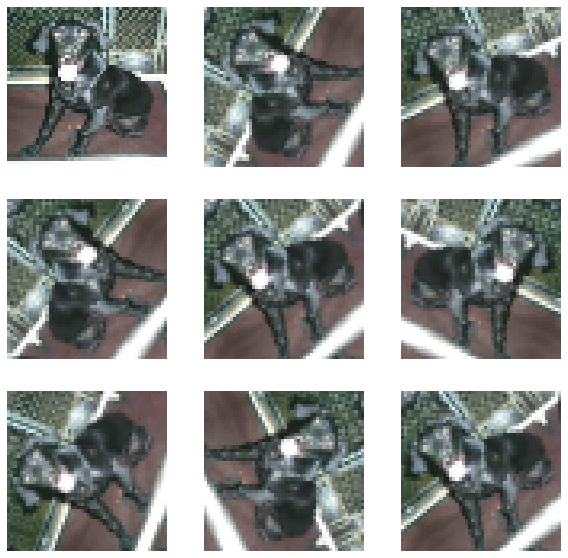

In [ ]:
for image, f in trainDataset.take(1):
  plt.figure(figsize = (10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmentedImage = dataAugmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmentedImage[0] / 255)
    plt.axis('off')

In [ ]:
preprocessInput = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [ ]:
# Create the base model from the pre-trained model MobileNet V2
imgShape = imgSize + (3,)
baseModel = tf.keras.applications.MobileNetV2(input_shape = imgShape, include_top=False, weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
imageBatch, labelBatch = next(iter(trainDataset))
featureBatch = baseModel(imageBatch)
print(featureBatch.shape)

(32, 5, 5, 1280)


In [ ]:
globalAverageLayer = tf.keras.layers.GlobalAveragePooling2D()
featureBatchAverage = globalAverageLayer(feature_batch)
# print(featureBatchAverage.shape)

(32, 1280)


In [ ]:
predictionLayer = tf.keras.layers.Dense(1)
predictionBatch = predictionLayer(featureBatchAverage)
print(predictionBatch.shape)

(32, 1)


In [ ]:
inputs = tf.keras.Input(shape = (160, 160, 3))
x = dataAugmentation(inputs)

x = preprocessInput(x)
x = baseModel(x, training = False)
x = globalAverageLayer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = predictionLayer(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
baseLearningRate = 0.0001
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = baseLearningRate), loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), metrics=['accuracy'])

In [ ]:
initialEpochs = 10

loss0, accuracy0 = model.evaluate(validationDataset)
history = model.fit(trainDataset,
                    epochs = initialEpochs,
                    validation_data = validationDataset)

26/26 [==============================] - 4s 65ms/step - loss: 0.6706 - accuracy: 0.5866
Epoch 1/10
63/63 [==============================] - 9s 89ms/step - loss: 0.6284 - accuracy: 0.6360 - val_loss: 0.4643 - val_accuracy: 0.7611
Epoch 2/10
63/63 [==============================] - 5s 82ms/step - loss: 0.4761 - accuracy: 0.7505 - val_loss: 0.3481 - val_accuracy: 0.8379
Epoch 3/10
63/63 [==============================] - 6s 85ms/step - loss: 0.3905 - accuracy: 0.8265 - val_loss: 0.2701 - val_accuracy: 0.8960
Epoch 4/10
63/63 [==============================] - 6s 85ms/step - loss: 0.3366 - accuracy: 0.8550 - val_loss: 0.2235 - val_accuracy: 0.9158
Epoch 5/10
63/63 [==============================] - 5s 81ms/step - loss: 0.2889 - accuracy: 0.8755 - val_loss: 0.1956 - val_accuracy: 0.9245
Epoch 6/10
63/63 [==============================] - 5s 82ms/step - loss: 0.2725 - accuracy: 0.8850 - val_loss: 0.1694 - val_accuracy: 0.9295
Epoch 7/10
63/63 [==============================] - 6s 83ms/step -

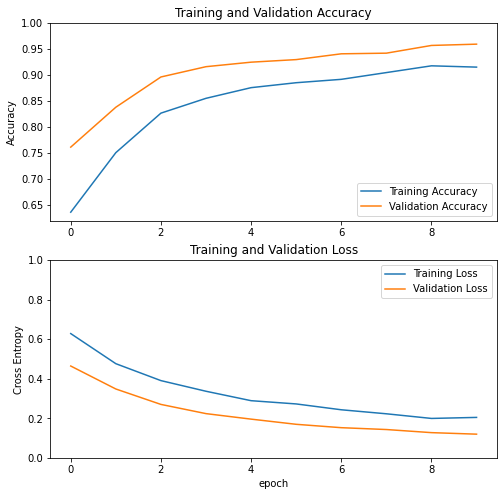

In [ ]:
acc = history.history['accuracy']
valAcc = history.history['val_accuracy']

loss = history.history['loss']
valLoss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label = 'Training Accuracy')
plt.plot(valAcc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label = 'Training Loss')
plt.plot(valLoss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()